***Problem Statement :***
- Prepare a classification model using SVM for salary data. 

***Data Description :***

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [40]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix)

# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing training & testing datasets
df_train = pd.read_csv("SalaryData_Train(1).csv")
df_test = pd.read_csv("SalaryData_Test(1).csv")

In [4]:
# Train dataset
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [5]:
# Dimensions of train data
df_train.shape

(30161, 14)

In [6]:
# Test data
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [7]:
# Dimensions of test data
df_test.shape

(15060, 14)

***Exploratory Data Analysis (EDA) :***

In [7]:
# Looking for null values in train data
df_train.isnull().any().any()

False

In [8]:
# Looking for null values in test data
df_test.isnull().any().any()

False

In [9]:
# Information about train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
# Information about test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
# Checking additional stats of numerical columns in train data
df_train.describe().T

count         mean          std   min   25%   50%   75%  \
age           30161.0    38.438115    13.134830  17.0  28.0  37.0  47.0   
educationno   30161.0    10.121316     2.550037   1.0   9.0  10.0  13.0   
capitalgain   30161.0  1092.044064  7406.466611   0.0   0.0   0.0   0.0   
capitalloss   30161.0    88.302311   404.121321   0.0   0.0   0.0   0.0   
hoursperweek  30161.0    40.931269    11.980182   1.0  40.0  40.0  45.0   

                  max  
age              90.0  
educationno      16.0  
capitalgain   99999.0  
capitalloss    4356.0  
hoursperweek     99.0

In [12]:
# Additional stats from test data
df_test.describe().T

count         mean          std   min   25%   50%   75%  \
age           15060.0    38.768327    13.380676  17.0  28.0  37.0  48.0   
educationno   15060.0    10.112749     2.558727   1.0   9.0  10.0  13.0   
capitalgain   15060.0  1120.301594  7703.181842   0.0   0.0   0.0   0.0   
capitalloss   15060.0    89.041899   406.283245   0.0   0.0   0.0   0.0   
hoursperweek  15060.0    40.951594    12.062831   1.0  40.0  40.0  45.0   

                  max  
age              90.0  
educationno      16.0  
capitalgain   99999.0  
capitalloss    3770.0  
hoursperweek     99.0

In [8]:
# Looking duplicate values in train data
df_train[df_train.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
30110   47   Private        HS-grad            9   Married-civ-spouse   
30118   20   Private        HS-grad            9        Never-married   
30132   22   Private   Some-college           10        Never-married   
30157   40   Private        HS-grad            9   Married-civ-spouse   
30159   22   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
30110        Craft-repair         Husband   White     Male            0   
30118   Machine-op-inspct       Own-child   White     Male            0   
30132        Adm-clerical       Own-child   White     Male            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30159        Adm-clerical       Own-child   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
30110            0            40   United-States   <=50K  
30118            0            40   United-States   <=50K  
30132            0            40   United-States   <=50K  
30157            0            40   United-States    >50K  
30159            0            20   United-States   <=50K  

[3258 rows x 14 columns]

In [9]:
# Droping duplicate values 
df_train = df_train.drop_duplicates()

# Dimensions after droping duplicate values
df_train.shape

(26903, 14)

In [10]:
# Looking for duplicate values in test data
df_test[df_test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [11]:
# Droping duplicate values in test data
df_test = df_test.drop_duplicates()

# Dimensions after droping duplicate values
df_test.shape

(14130, 14)

In [13]:
# Correlation between numerical columns in train data
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

In [14]:
# Correlation between each numerical columns in test data
corr = df_test.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

In [15]:
df_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

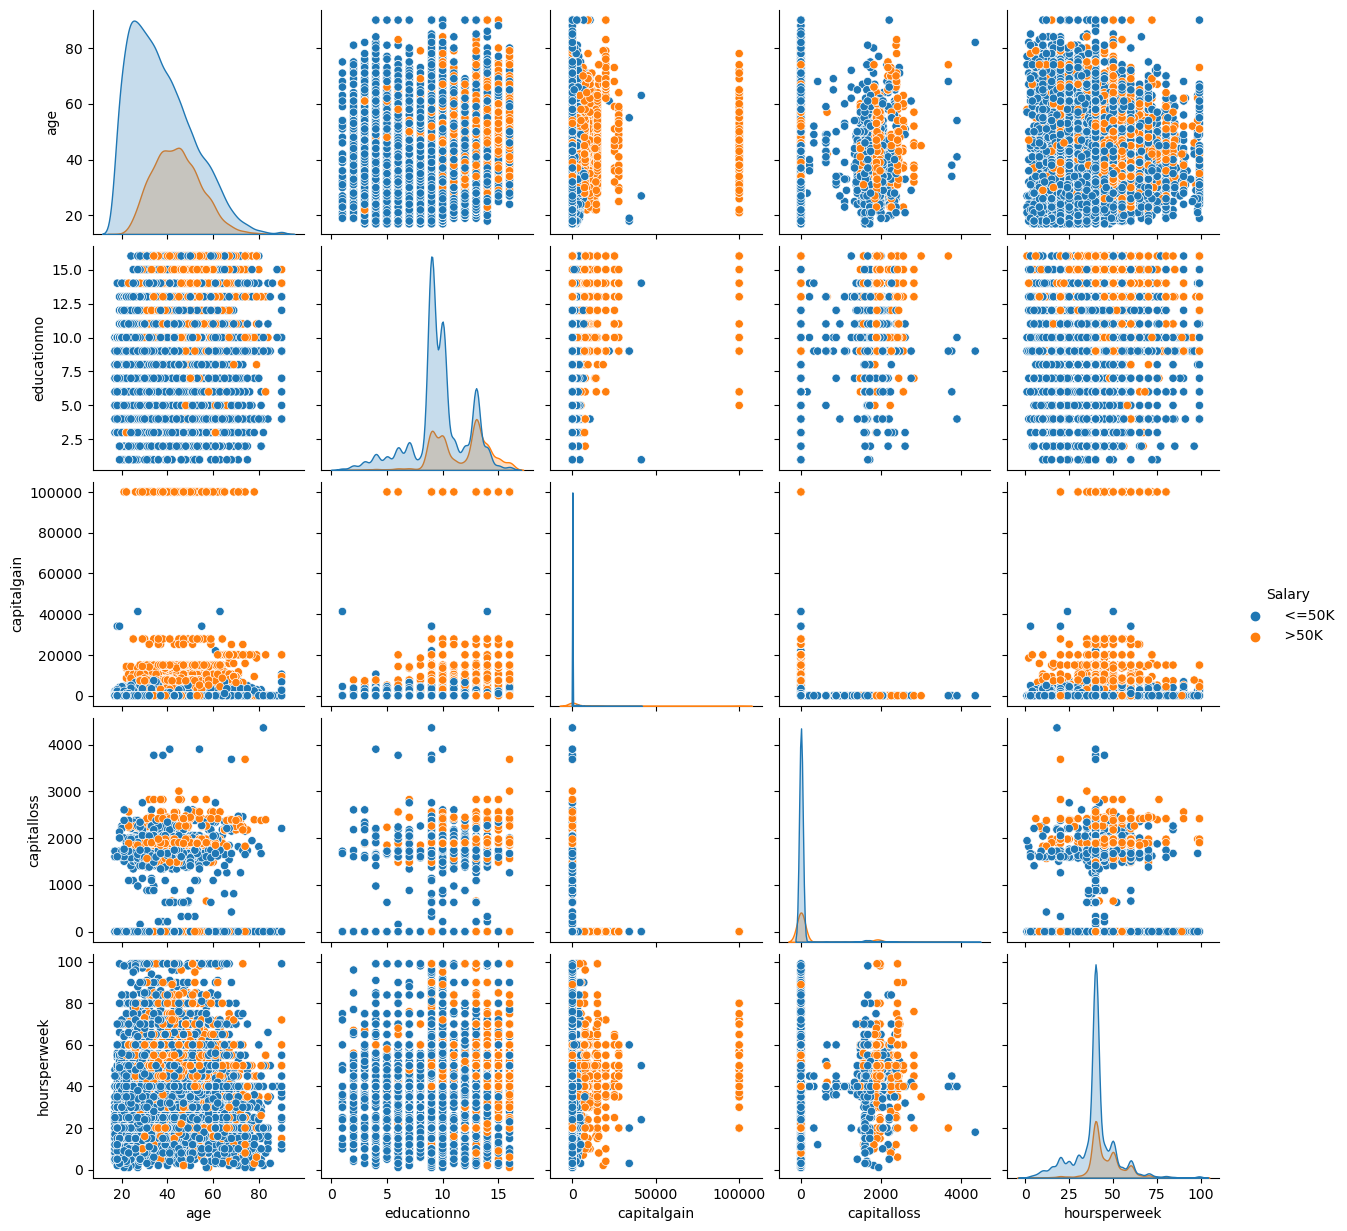

In [20]:
sns.pairplot(data=df_train, hue='Salary')

In [21]:
df_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

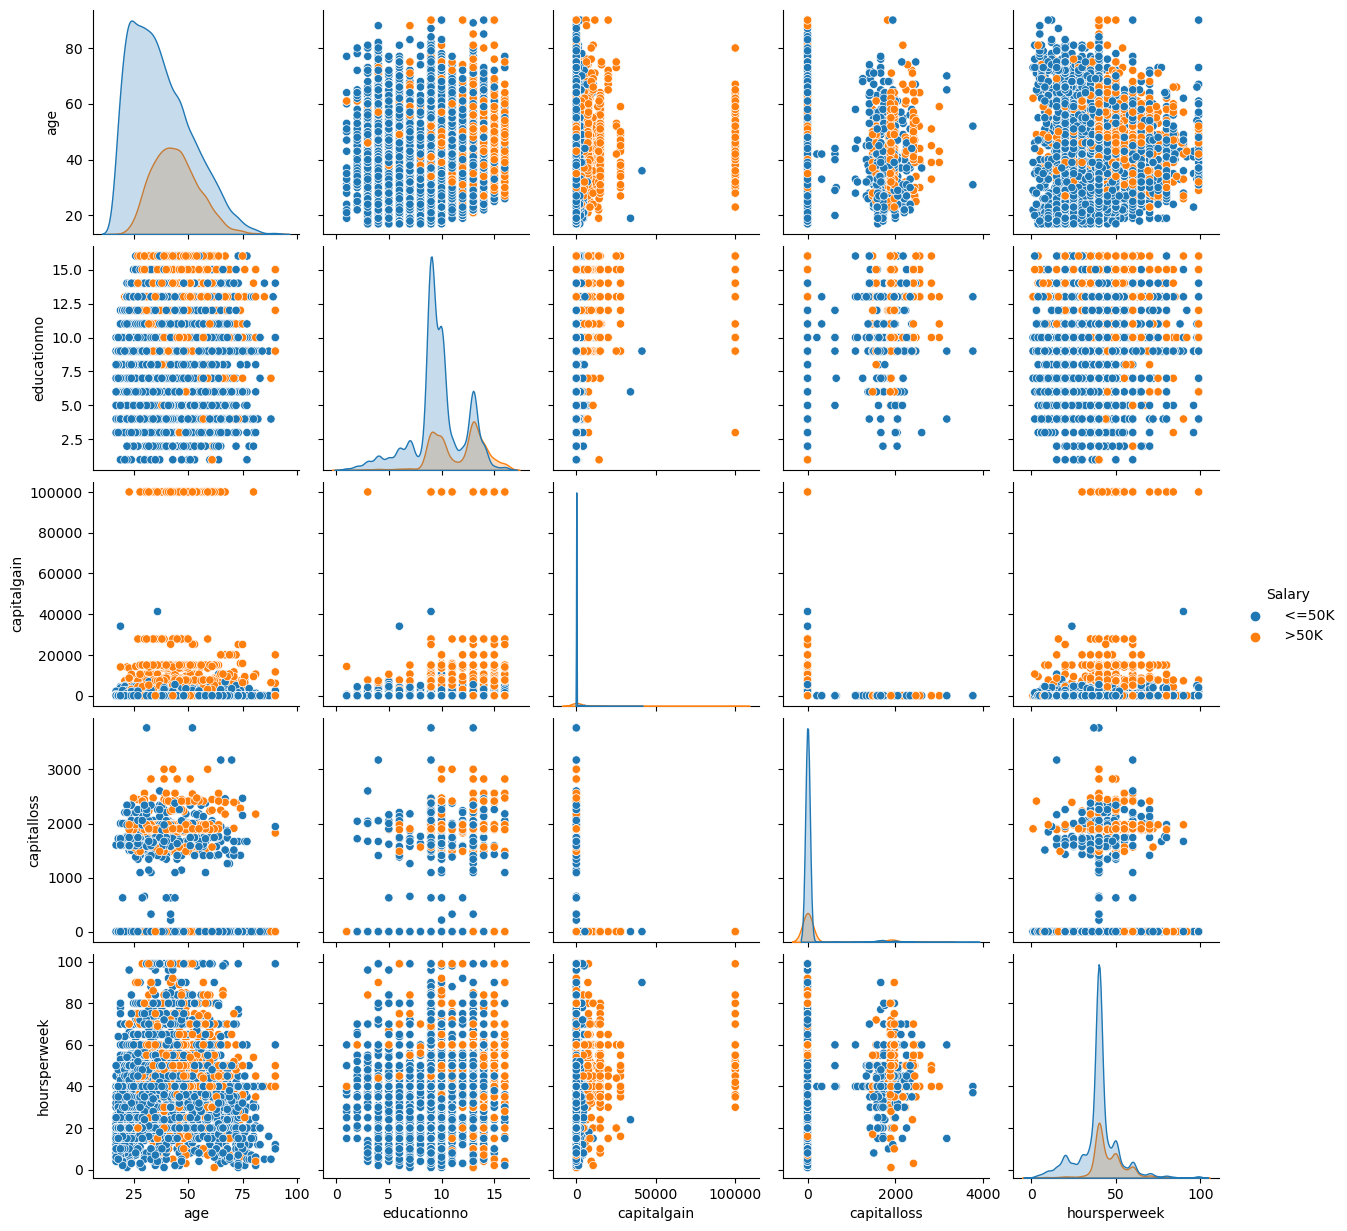

In [22]:
sns.pairplot(data=df_test,hue='Salary')

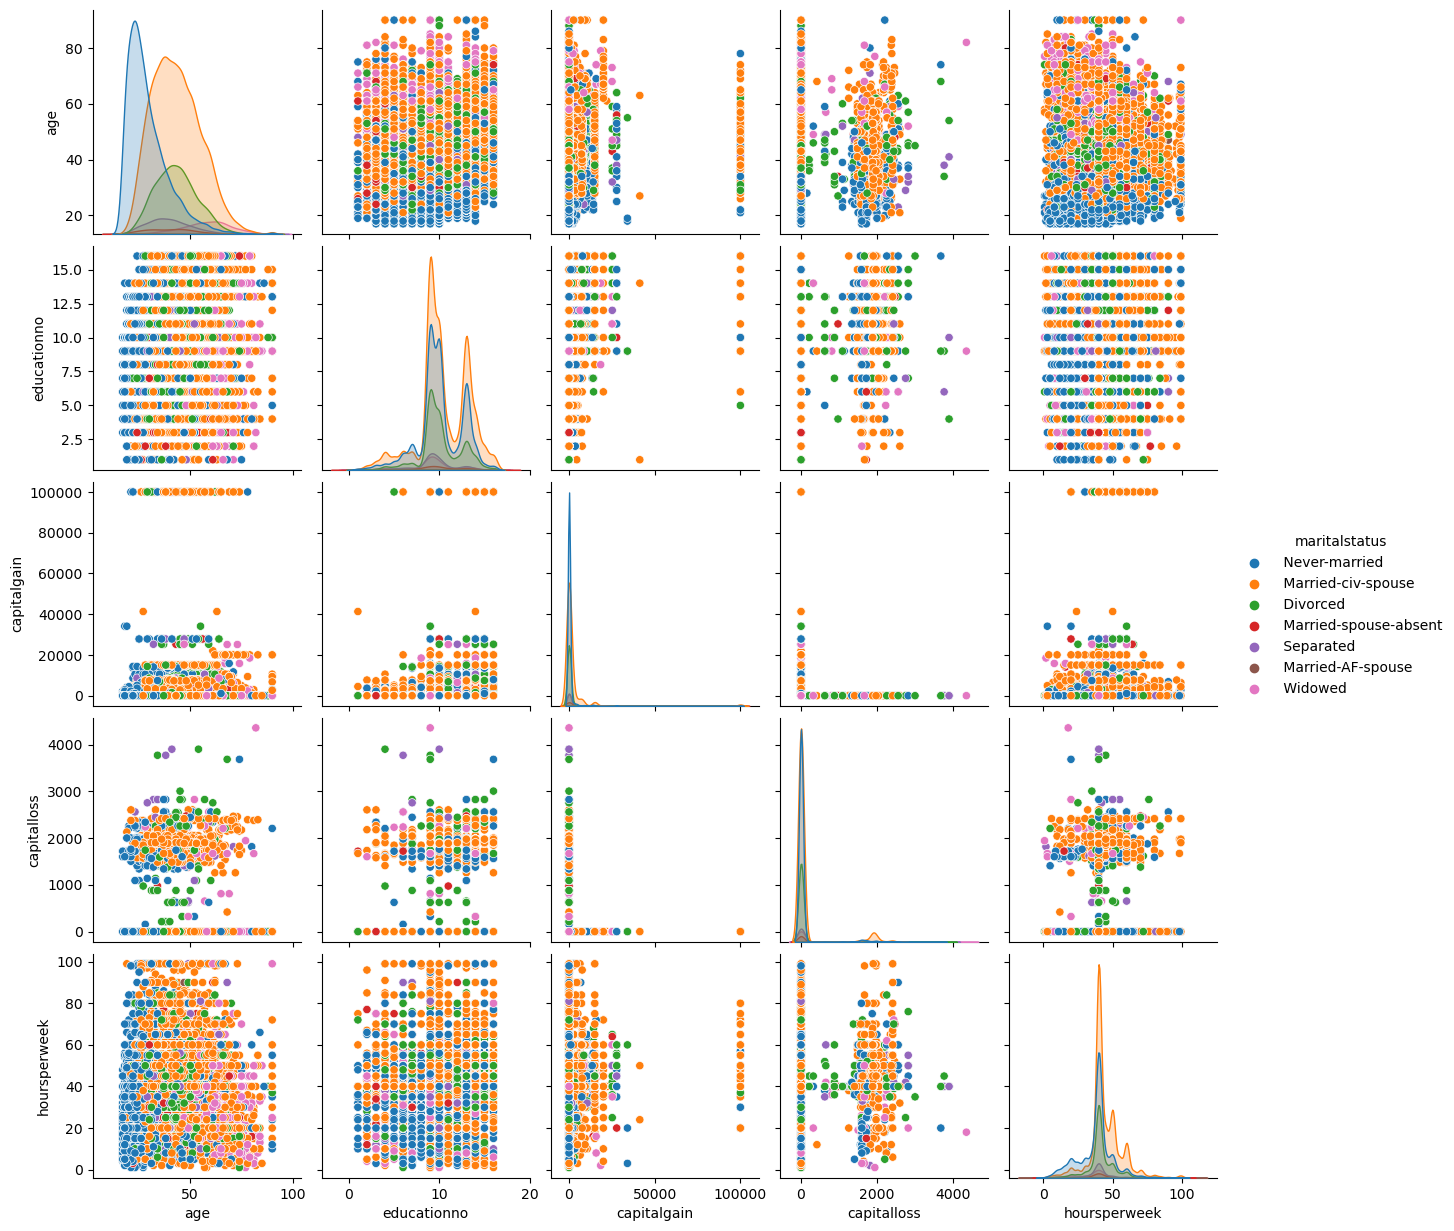

In [23]:
sns.pairplot(data=df_train, hue='maritalstatus')

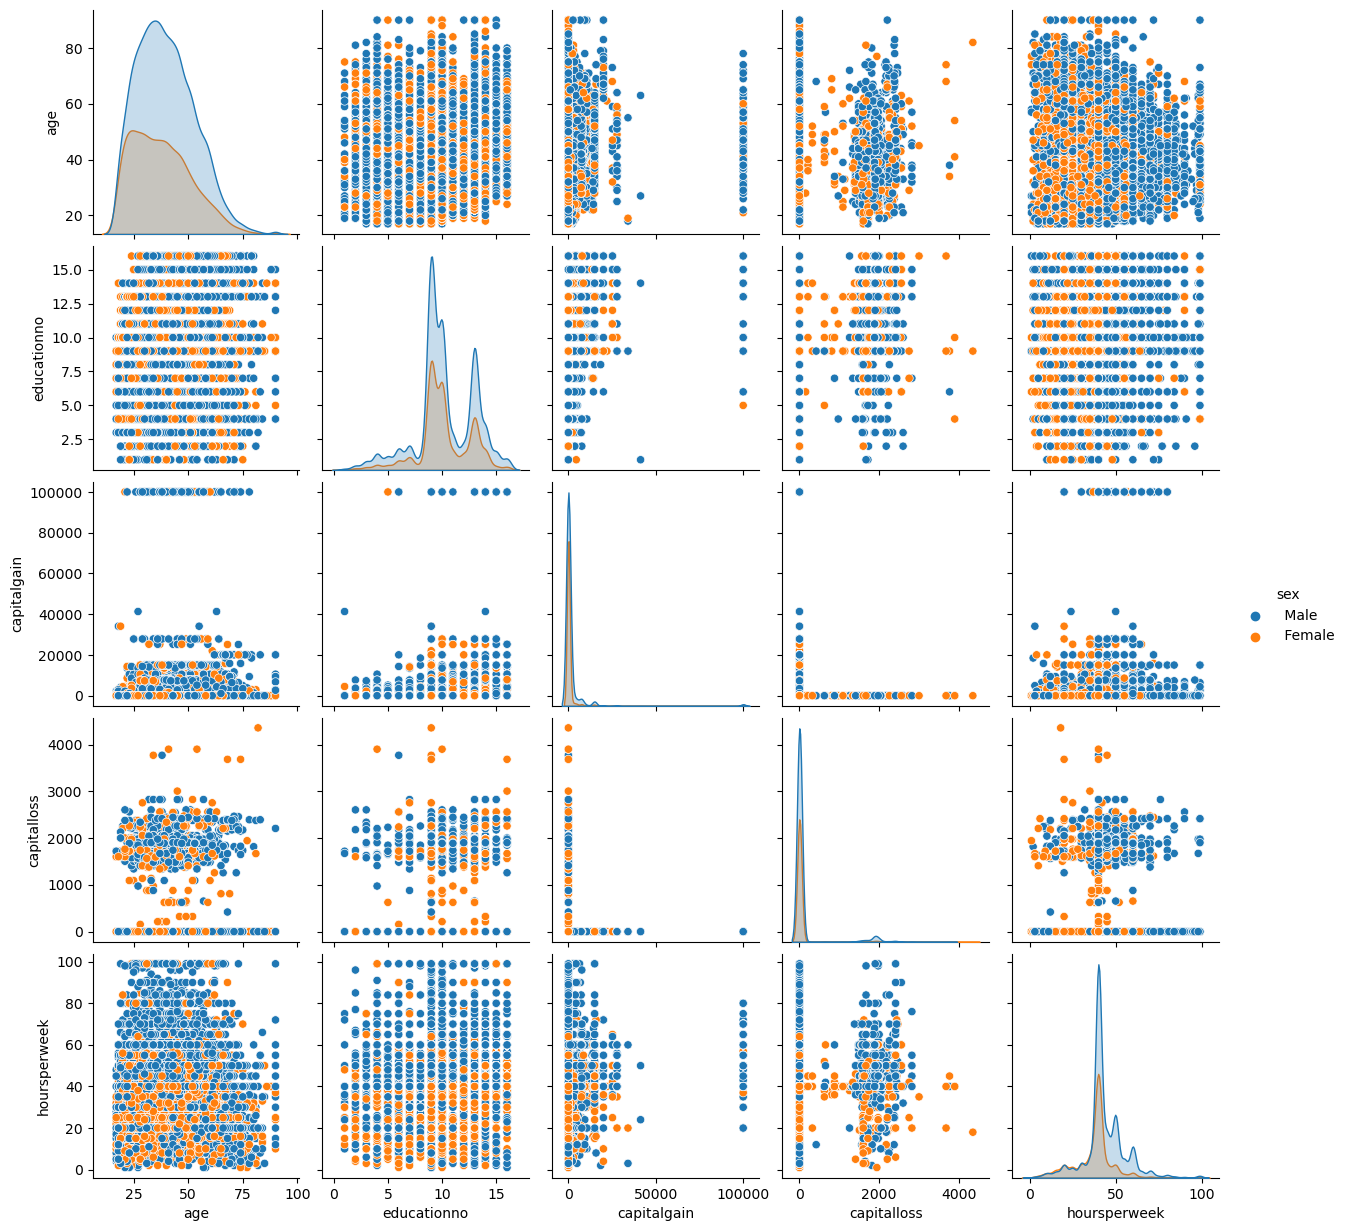

In [24]:
sns.pairplot(data=df_train, hue='sex')

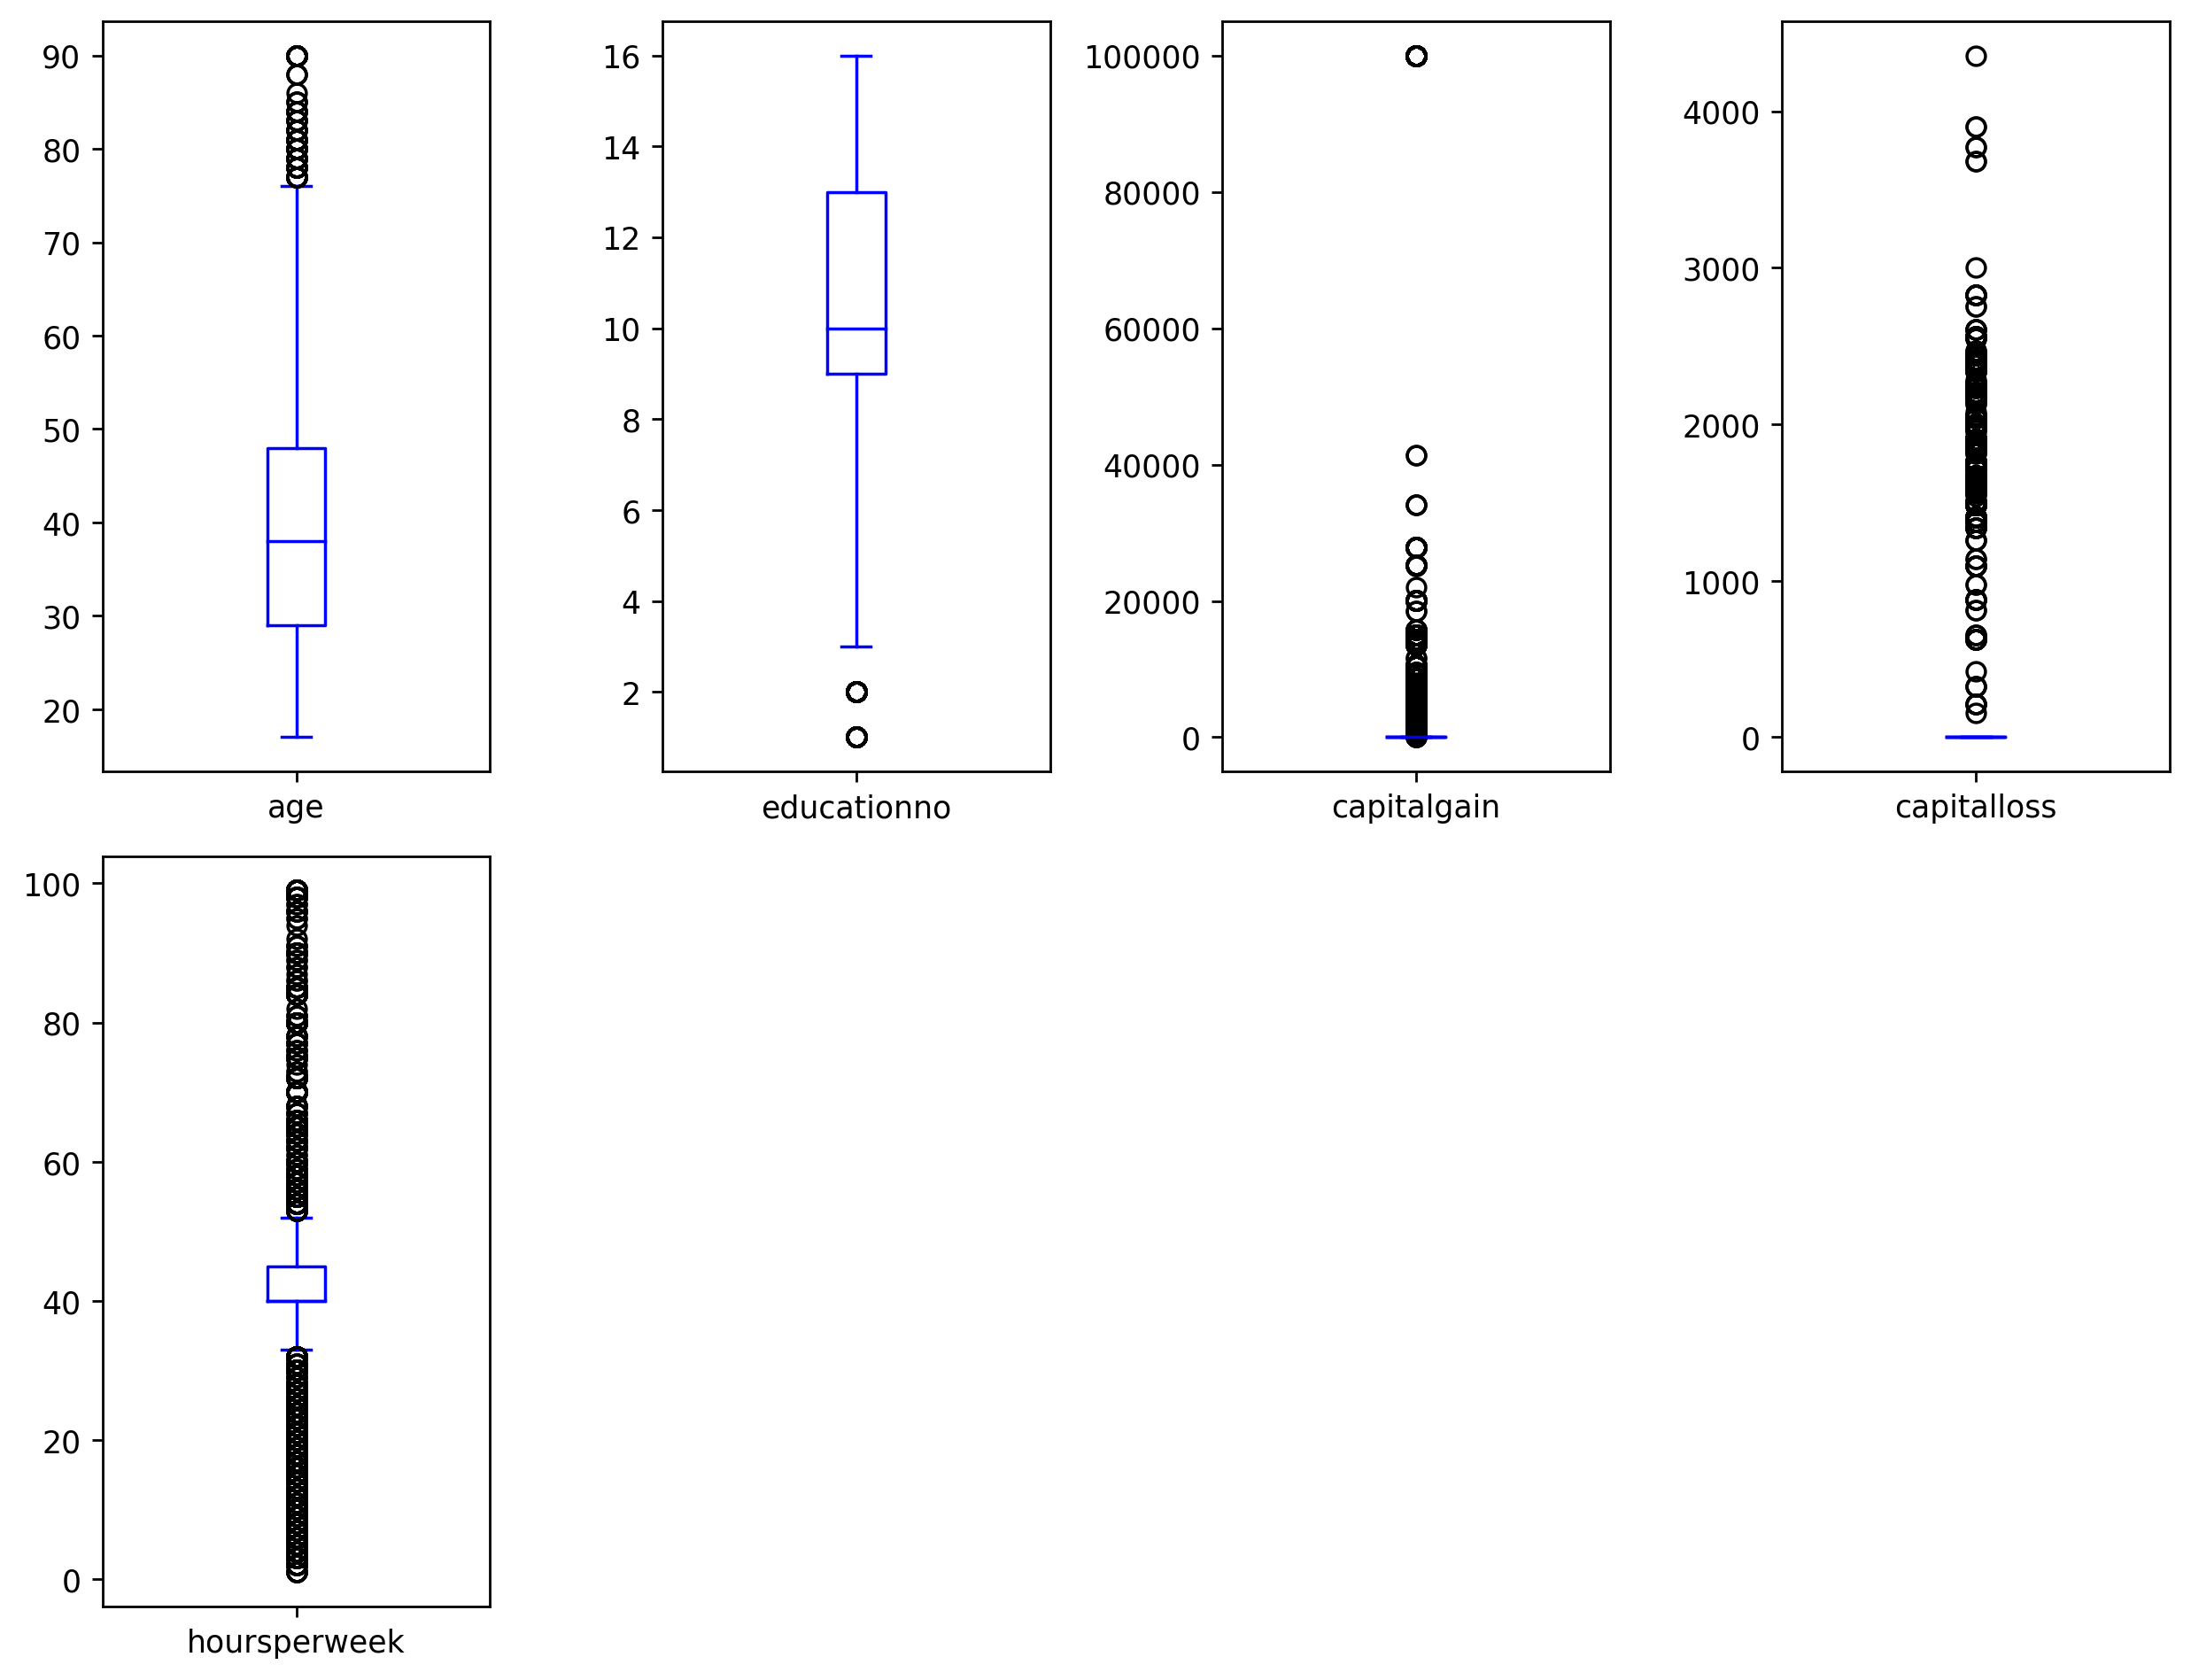

In [16]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
df_train.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

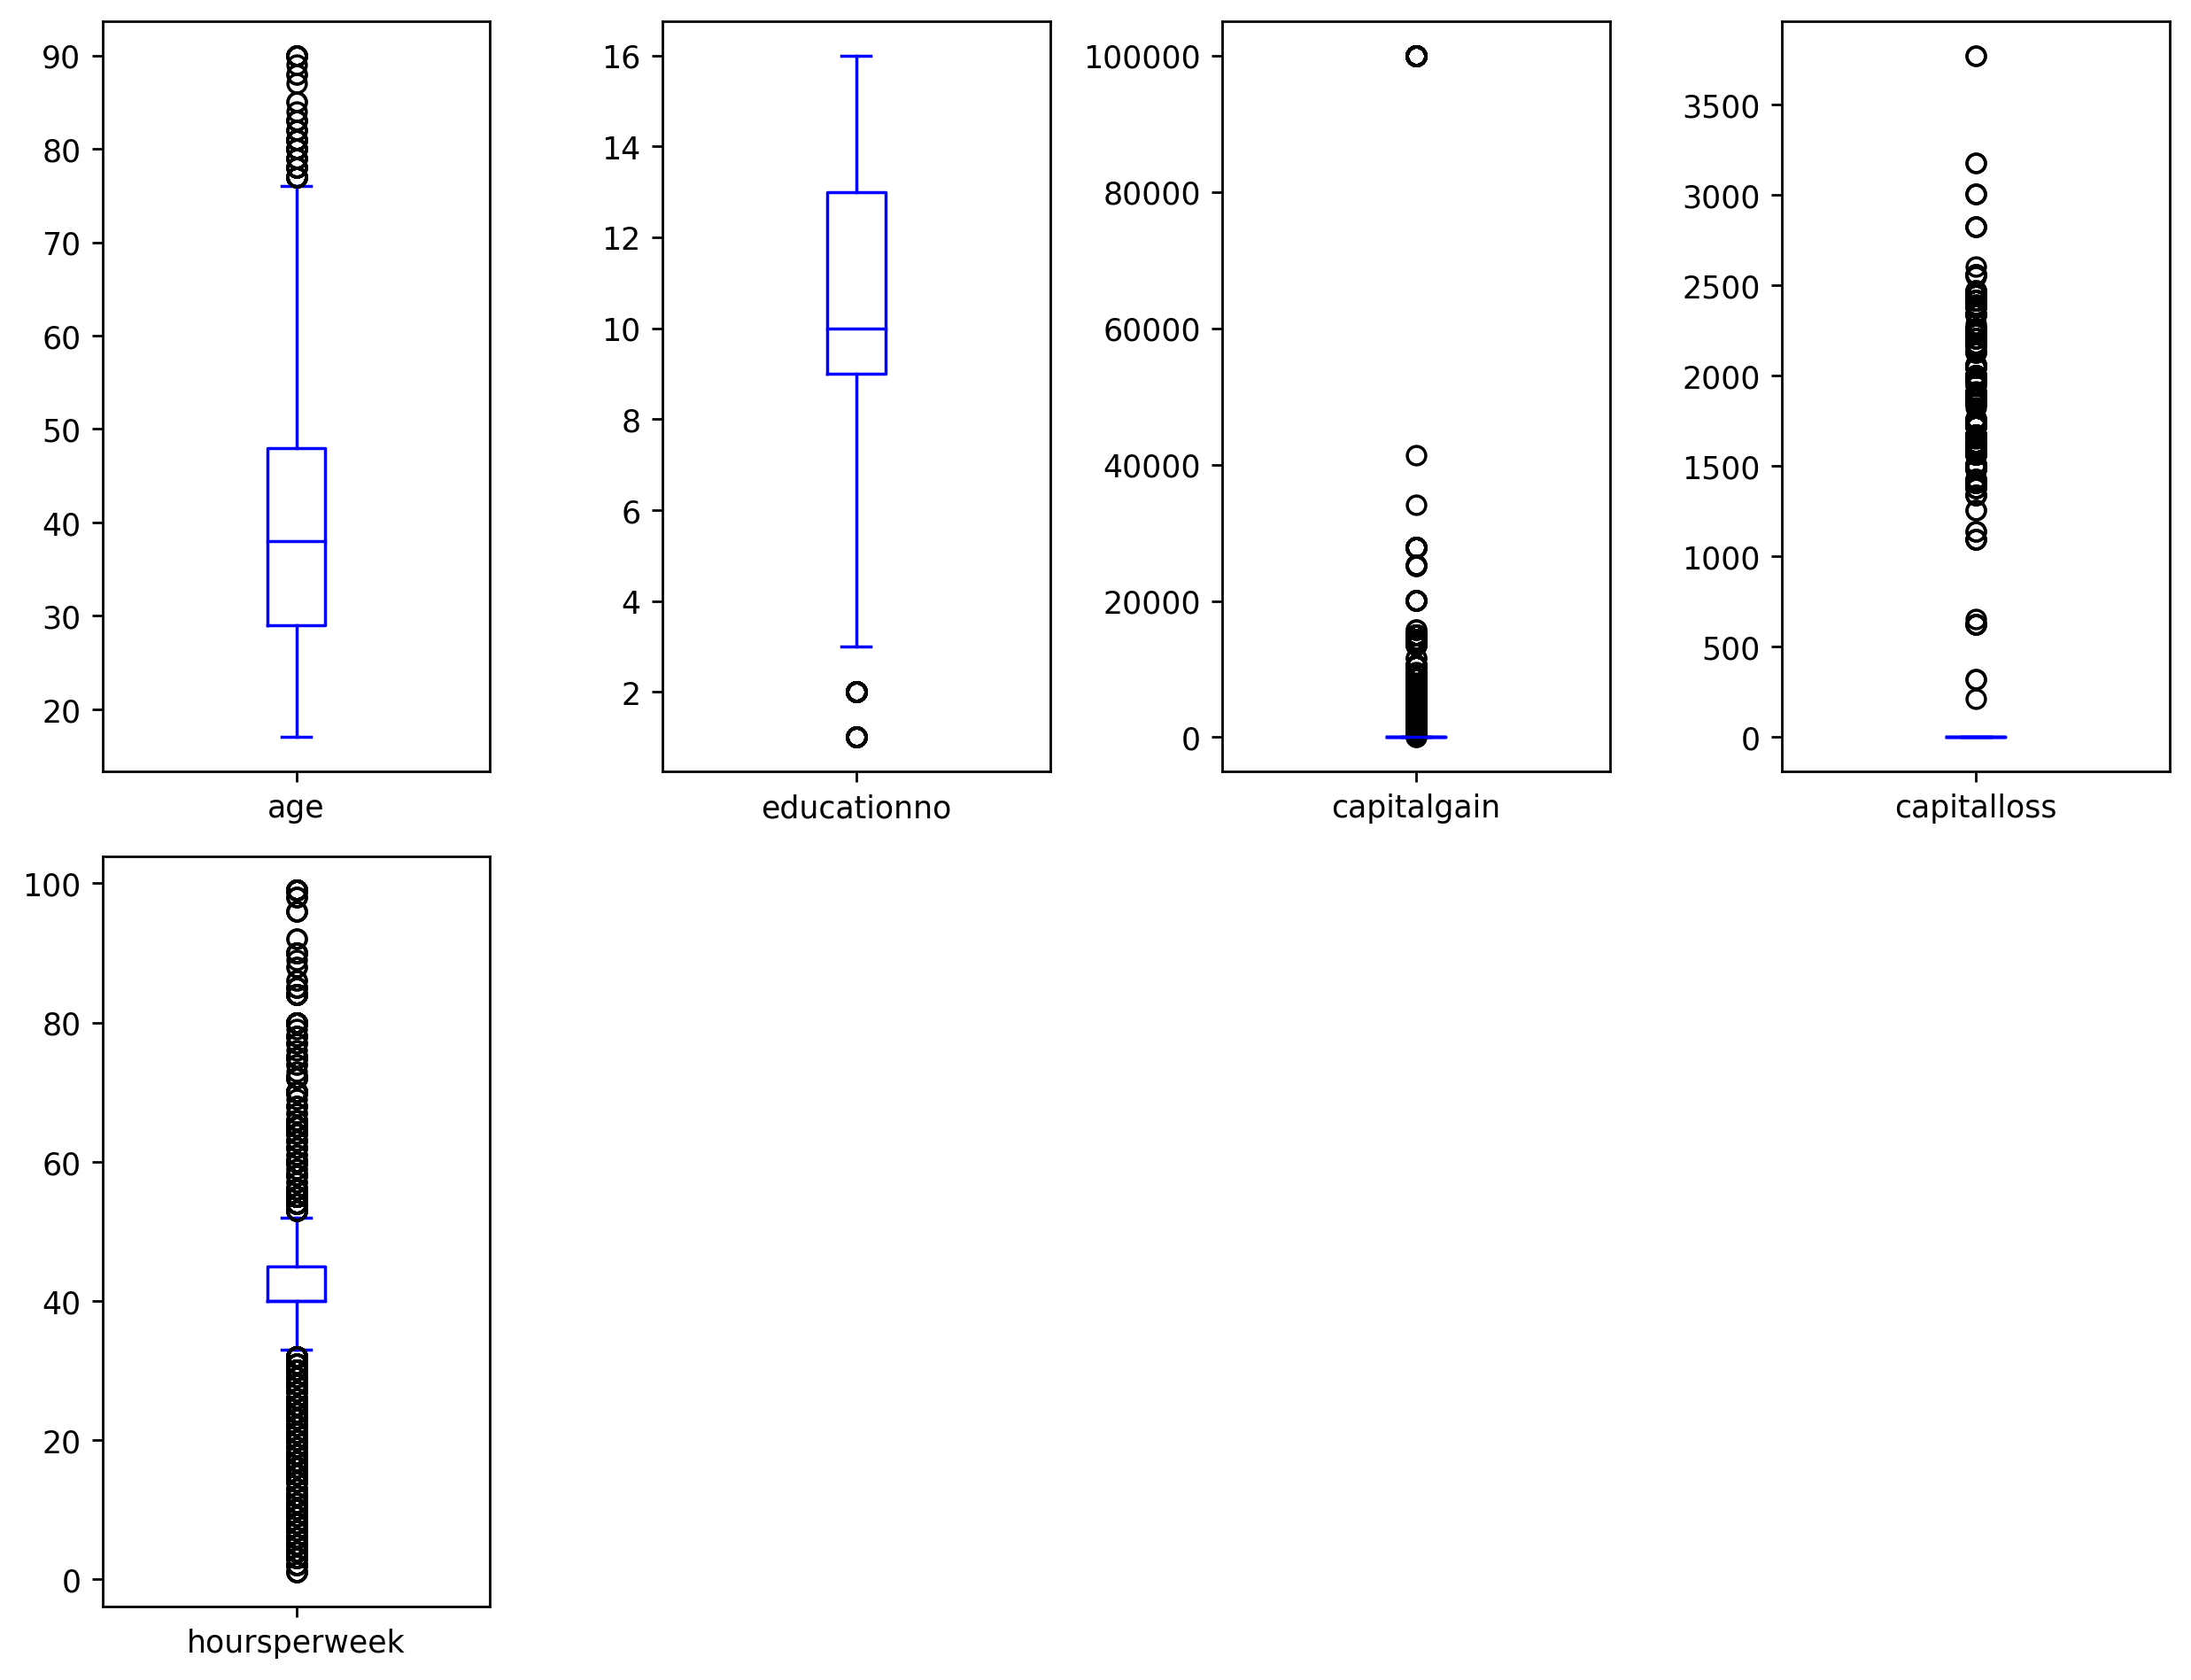

In [17]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
df_test.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

<Figure size 2500x2500 with 0 Axes>

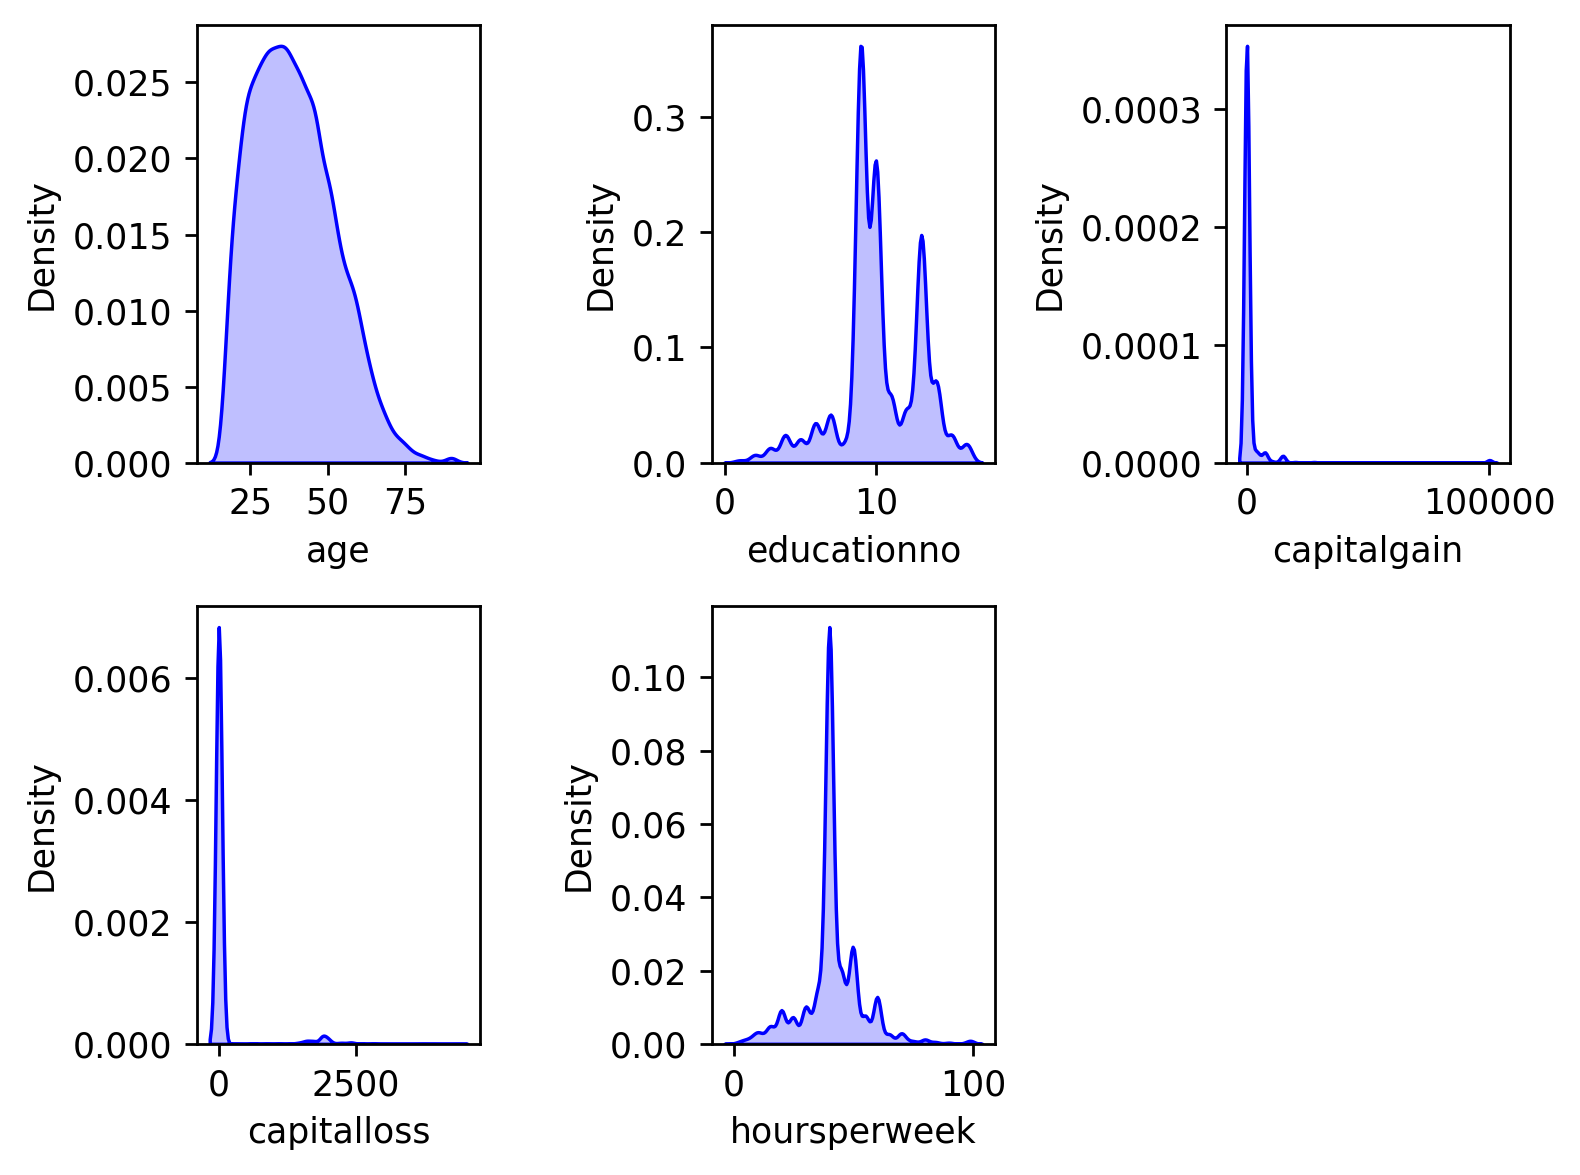

In [18]:
# Checking distribution of train data

no_columns = df_train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(10,10))
plt.figure(dpi=250)
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(df_train[column],color='blue',shade=True)
plt.tight_layout()

***Label Encoding :***
- Converting categorical columns into numerical columns.

In [12]:
le = LabelEncoder()

In [13]:
# Selecting those columns wich are categorical in both datasets

train_cat_col = df_train.select_dtypes(include=[object]).columns

test_cat_col = df_test.select_dtypes(include=[object]).columns

In [14]:
# Converting those columns from categorical to numerical in both datasets

df_train[train_cat_col] = df_train[train_cat_col].apply(lambda col : le.fit_transform(col))

df_test[test_cat_col] = df_test[test_cat_col].apply(lambda col : le.fit_transform(col))

In [15]:
# After encoding train dataset

df_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [16]:
# After encoding test dataset

df_test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

***Training & Testing the model :***

In [17]:
# Loading training dataset
xtrain = df_train.drop("Salary",axis=1)
ytrain = df_train["Salary"]

# Loading testing dataset
xtest = df_test.drop("Salary",axis=1)
ytest = df_test["Salary"]

In [18]:
# Normalizing the datasets
sc = StandardScaler()

In [19]:
# Fitting the training data
sc.fit_transform(xtrain)

# transform the training data to have a mean of 0 and a standard deviation of 1
xtrain = sc.transform(xtrain)

# transform the test data using the same mean and standard deviation as the training data
xtest = sc.transform(xtest)

***Note : There is no need to normalize the target variables 'ytrain' and 'ytest' as they are already in the desired format.***

***Using Radial Basis Function (rbf) Kernel :***

In [20]:
# Training SVM classifier
rbf_clf = svm.SVC(kernel='rbf')
rbf_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = rbf_clf.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [21]:
# Confusion matrix
confusion_matrix(ytest,ypred)

array([[10007,   613],
       [ 1592,  1918]], dtype=int64)

In [22]:
pd.crosstab(ytest.values.flatten(),rbf_clf)

col_0  SVC()
row_0       
0      10620
1       3510

In [23]:
print("Train SVC Score :", rbf_clf.score(xtrain,ytrain))
print("Test SVC Score :", rbf_clf.score(xtest,ytest))

Train SVC Score : 0.8465970337880534
Test SVC Score : 0.8439490445859873


In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10620
           1       0.76      0.55      0.63      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.74      0.77     14130
weighted avg       0.84      0.84      0.83     14130



In [25]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.8439490445859873


***Using Polynomial (poly) Kernel :***

In [26]:
# Training SVM classifier
poly_clf = svm.SVC(kernel='poly')
poly_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = poly_clf.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [27]:
print("Train SVC Score :", poly_clf.score(xtrain,ytrain))
print("Test SVC Score :", poly_clf.score(xtest,ytest))

Train SVC Score : 0.837007025238821
Test SVC Score : 0.8367303609341826


In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10620
           1       0.77      0.49      0.60      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.72      0.75     14130
weighted avg       0.83      0.84      0.82     14130



In [29]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.8367303609341826


***Using Linear Kernel :***

In [30]:
# Training SVM classifier
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = linear_clf.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
print("Train SVC Score :", linear_clf.score(xtrain,ytrain))
print("Test SVC Score :", linear_clf.score(xtest,ytest))

Train SVC Score : 0.8051518418020295
Test SVC Score : 0.8042462845010616


In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     10620
           1       0.76      0.31      0.44      3510

    accuracy                           0.80     14130
   macro avg       0.79      0.64      0.66     14130
weighted avg       0.80      0.80      0.77     14130



In [34]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.8042462845010616


***Using Sigmoid Kernel :***

In [35]:
# Training SVM classifier
sigmoid_clf = svm.SVC(kernel='sigmoid')
sigmoid_clf.fit(xtrain,ytrain)

# Prediction for xtest
ypred = sigmoid_clf.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
print("Train SVC Score :", sigmoid_clf.score(xtrain,ytrain))
print("Test SVC Score :", sigmoid_clf.score(xtest,ytest))

Train SVC Score : 0.7456417499907073
Test SVC Score : 0.7507430997876858


In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10620
           1       0.50      0.50      0.50      3510

    accuracy                           0.75     14130
   macro avg       0.67      0.67      0.67     14130
weighted avg       0.75      0.75      0.75     14130



In [39]:
print('Model Accuracy :',accuracy_score(ytest,ypred))

Model Accuracy : 0.7507430997876858


# Conclusion :
- Using Radial Basis Function (rbf) kernel model accuracy is 0.8439 (84.39%).
- Using Polynominal (poly) kernel model accuracy is 0.8367 (83.67%).
- Using Linear kernel model accuracy is 0.8042 (80.42%).
- Usin Sigmoid kernel model accuray is 0.7507 (75.07%).


***The best kernel for Support Vector Machines / Classifier is Radial Basis Function (rbf) kernel which gives 84.39% accuracy.***